<a href="https://colab.research.google.com/github/yeesem/Deep_Learning/blob/main/Multi_Class_Classifier_.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
# Download the train set
!wget https://storage.googleapis.com/tensorflow-1-public/course2/week4/rps.zip

# Download the test set
!wget https://storage.googleapis.com/tensorflow-1-public/course2/week4/rps-test-set.zip

--2024-04-11 03:25:05--  https://storage.googleapis.com/tensorflow-1-public/course2/week4/rps.zip
Resolving storage.googleapis.com (storage.googleapis.com)... 74.125.196.207, 108.177.11.207, 142.251.162.207, ...
Connecting to storage.googleapis.com (storage.googleapis.com)|74.125.196.207|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 200682221 (191M) [application/zip]
Saving to: ‘rps.zip’

rps.zip             100%[===================>] 191.38M   149MB/s    in 1.3s    

2024-04-11 03:25:07 (149 MB/s) - ‘rps.zip’ saved [200682221/200682221]

--2024-04-11 03:25:07--  https://storage.googleapis.com/tensorflow-1-public/course2/week4/rps-test-set.zip
Resolving storage.googleapis.com (storage.googleapis.com)... 74.125.196.207, 108.177.11.207, 142.251.162.207, ...
Connecting to storage.googleapis.com (storage.googleapis.com)|74.125.196.207|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 29516758 (28M) [application/zip]
Saving to: ‘rps-test-s

In [3]:
import zipfile

# Extract the archive
local_zip = './rps.zip'
zip_ref = zipfile.ZipFile(local_zip,'r')
zip_ref.extractall('tmp/rps-train')
zip_ref.close()

local_zip = 'rps-test-set.zip'
zip_ref = zipfile.ZipFile(local_zip,'r')
zip_ref.extractall()
zip_ref.close()

In [8]:
import os

base_dir  = 'tmp/rps-train/rps'

rock_dir = os.path.join(base_dir,'rock')
paper_dir = os.path.join(base_dir,'paper')
scissor_dir = os.path.join(base_dir,'scissors')

print('Total training rock images    : ',len(os.listdir(rock_dir)))
print('Total training paper images   : ',len(os.listdir(paper_dir)))
print('Total training sciccor images : ',len(os.listdir(scissor_dir)))

rock_file_names = os.listdir(rock_dir)[:10]
print(rock_file_names)

paper_file_names = os.listdir(paper_dir)[:10]
print(paper_file_names)

scissor_file_names = os.listdir(scissor_dir)[:10]
print(scissor_file_names)

Total training rock images    :  840
Total training paper images   :  840
Total training sciccor images :  840
['rock05ck01-046.png', 'rock02-050.png', 'rock01-007.png', 'rock01-029.png', 'rock05ck01-034.png', 'rock03-038.png', 'rock04-036.png', 'rock07-k03-104.png', 'rock07-k03-011.png', 'rock02-052.png']
['paper03-038.png', 'paper03-014.png', 'paper02-001.png', 'paper06-051.png', 'paper06-011.png', 'paper03-028.png', 'paper02-022.png', 'paper02-028.png', 'paper05-062.png', 'paper05-021.png']
['scissors01-091.png', 'scissors02-045.png', 'scissors02-069.png', 'testscissors03-076.png', 'scissors01-031.png', 'scissors01-061.png', 'scissors03-117.png', 'testscissors03-090.png', 'scissors02-009.png', 'testscissors03-091.png']


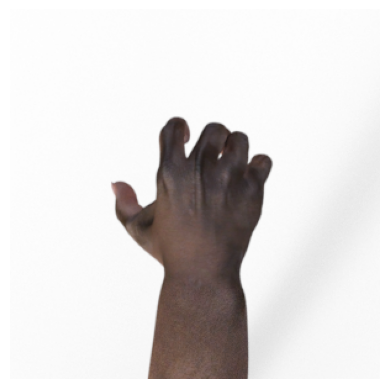

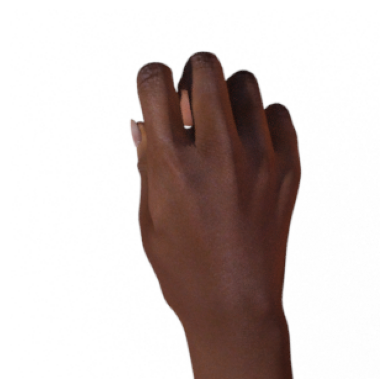

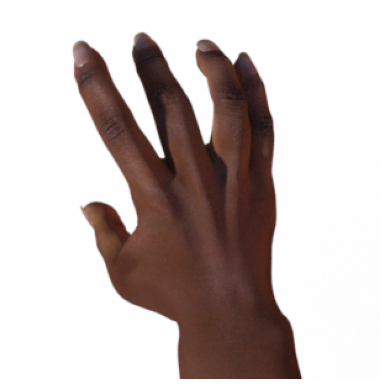

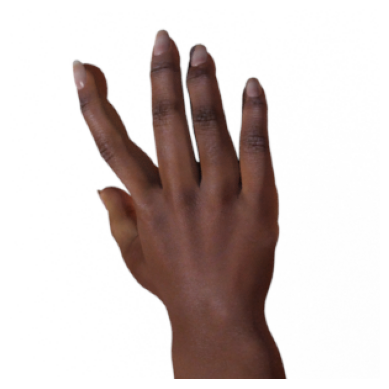

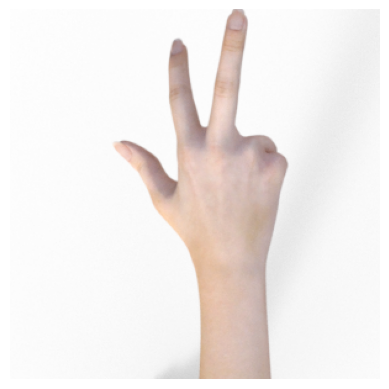

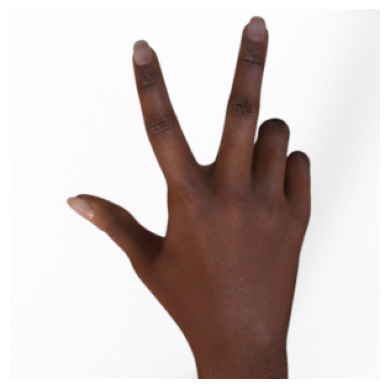

In [14]:
%matplotlib inline

import matplotlib.pyplot as plt
import matplotlib.pyplot as mpimg

pic_index = 2

next_rock = [os.path.join(rock_dir,fname)
            for fname in rock_file_names[pic_index - 2 : pic_index]]

next_paper = [os.path.join(paper_dir,fname)
             for fname in paper_file_names[pic_index - 2 : pic_index]]

next_scissor = [os.path.join(scissor_dir,fname)
               for fname in scissor_file_names[pic_index - 2 : pic_index]]


for i, img_path in enumerate(next_rock + next_paper + next_scissor):
  img = mpimg.imread(img_path)
  plt.imshow(img)
  plt.axis('off')
  plt.show()

In [20]:
# Build the model
import tensorflow as tf

model = tf.keras.models.Sequential([
    # First convolution
    tf.keras.layers.Conv2D(64,(3,3),activation = 'relu',input_shape = (150,150,3)),
    tf.keras.layers.MaxPooling2D(2,2),
    # Second convolution
    tf.keras.layers.Conv2D(64,(3,3),activation = 'relu'),
    tf.keras.layers.MaxPooling2D(2,2),
    # Third convolution
    tf.keras.layers.Conv2D(128,(3,3),activation = 'relu'),
    tf.keras.layers.MaxPooling2D(2,2),
    # Fourth convolution
    tf.keras.layers.Conv2D(128,(3,3),activation = 'relu'),
    tf.keras.layers.MaxPooling2D(2,2),

    # Flatten the results to feed into a DNN
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dropout(0.5),
    tf.keras.layers.Dense(512,activation = 'relu'),
    tf.keras.layers.Dense(3,activation = 'softmax')
])

# Print the model summary
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_10 (Conv2D)          (None, 148, 148, 64)      1792      
                                                                 
 max_pooling2d_8 (MaxPoolin  (None, 74, 74, 64)        0         
 g2D)                                                            
                                                                 
 conv2d_11 (Conv2D)          (None, 72, 72, 64)        36928     
                                                                 
 max_pooling2d_9 (MaxPoolin  (None, 36, 36, 64)        0         
 g2D)                                                            
                                                                 
 conv2d_12 (Conv2D)          (None, 34, 34, 128)       73856     
                                                                 
 max_pooling2d_10 (MaxPooli  (None, 17, 17, 128)       0

In [21]:
# Set the training parameters
model.compile(loss = 'categorical_crossentropy',
              optimizer = 'rmsprop',
              metrics = ['accuracy'])

In [25]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

TRAINING_DIR = 'tmp/rps-train/rps'
training_datagen = ImageDataGenerator(
    rescale = 1./255,
    rotation_range = 40,
    width_shift_range = 0.2,
    height_shift_range = 0.2,
    shear_range = 0.2,
    zoom_range = 0.2,
    horizontal_flip = True,
    fill_mode = 'nearest'
)

VALIDATION_DIR = 'rps-test-set'
validation_datagen = ImageDataGenerator(
    rescale = 1./255
)

train_generator = training_datagen.flow_from_directory(
    TRAINING_DIR,
    batch_size = 126,
    target_size = (150,150),
    class_mode = 'categorical'
)

validation_generator = validation_datagen.flow_from_directory(
    VALIDATION_DIR,
    batch_size = 126,
    target_size = (150,150),
    class_mode = 'categorical'
)

Found 2520 images belonging to 3 classes.
Found 372 images belonging to 3 classes.


In [ ]:
# Train the model
history = model.fit(
    train_generator,
    epochs = 25,
    steps_per_epoch = 20,
    validation_data = validation_generator,
    validation_steps = 3,
    verbose = 1
)

Epoch 1/25
15/20 [=====================>........] - ETA: 58s - loss: 1.1611 - accuracy: 0.3466 